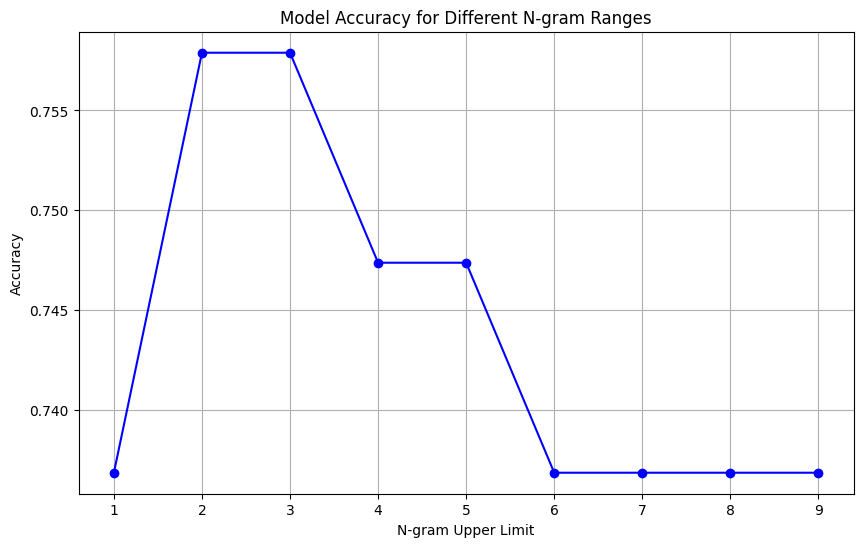

In [10]:
import pandas as pd
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Set of English stopwords and punctuation
stop_words = set(stopwords.words('english')).union(set(string.punctuation))

# Load the data
df = pd.read_csv('text03b.txt', sep='\t')

# Function to remove stopwords and punctuation
def remove_stopwords_and_punctuation(text):
    word_tokens = word_tokenize(text)
    filtered_sentence = [word for word in word_tokens if not word.lower() in stop_words]
    return ' '.join(filtered_sentence)

# Apply the function to remove stopwords and punctuation
df['Text'] = df['Text'].apply(remove_stopwords_and_punctuation)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Label'], test_size=0.20, random_state=42, shuffle=True)

# Initialize a list to store accuracies for different n-grams
n_gram_accuracies = []

# Loop through n values from 1 to 6
N=10
for n in range(1, N):
    # Vectorize the text data using n-grams
    vectorizer = CountVectorizer(ngram_range=(1, n))
    X_train_counts = vectorizer.fit_transform(X_train)
    X_test_counts = vectorizer.transform(X_test)

    # Train a Multinomial Naive Bayes classifier
    clf = MultinomialNB()
    clf.fit(X_train_counts, y_train)

    # Predict the labels for the test set
    y_pred = clf.predict(X_test_counts)

    # Calculate and store the accuracy of the model on the test set
    accuracy = accuracy_score(y_test, y_pred)
    n_gram_accuracies.append(accuracy)

# Plotting the accuracies for different n-grams
plt.figure(figsize=(10, 6))
plt.plot(range(1, N), n_gram_accuracies, marker='o', linestyle='-', color='b')
plt.title('Model Accuracy for Different N-gram Ranges')
plt.xlabel('N-gram Upper Limit')
plt.ylabel('Accuracy')
plt.xticks(range(1, N))  # Set x-ticks to show every n-gram value
plt.grid(True)
plt.show()

In [ ]:
n_gram_accuracies[3]